In [1]:
import getpass

user = getpass.getuser()
from omni.isaac.kit import SimulationApp

# Set the path below to your desired nucleus server
# Make sure you installed a local nucleus server before this
# simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/demo_raycast.usd"})
# simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/pre-world.usd"})
# simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/texture_sandbox.usd"})
simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/power_thermal_demo.usd"})

[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] =========================== DEPRECATION WARNING ===========================
[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] Traceback (most recent call last):
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/runpy.py', line 196
[Warning] [omni.isaac.kit]   return _run_code(code, main_globals, None,
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/runpy.py', line 86
[Warning] [omni.isaac.kit]   exec(code, run_globals)
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/site-packages/ipykernel_launcher.py', line 18
[Warning] [omni.isaac.kit]   app.launch_new_instance()
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/site-packages/traitlets/config/application.py', line 1075
[Warning] [omni.isaac.kit]   app.sta

t.widget.filter-1.1.4] startup
[1.409s] [ext: omni.graph.core-2.170.3] startup
[1.411s] [ext: omni.kit.window.extensions-1.4.9] startup
[1.417s] [ext: omni.kit.hotkeys.core-1.3.3] startup
[1.417s] [ext: omni.kit.context_menu-1.8.0] startup
[1.419s] [ext: omni.mdl-52.0.1] startup
[1.435s] [ext: omni.iray.libs-0.0.0] startup
[1.438s] [ext: omni.kit.primitive.mesh-1.0.16] startup
[1.441s] [ext: omni.kit.stage_template.core-1.1.21] startup
[1.442s] [ext: omni.mdl.neuraylib-0.2.5] startup
[1.443s] [ext: omni.ujitso.processor.texture-1.0.0] startup
[1.443s] [ext: omni.kit.window.file_exporter-1.0.29] startup
[1.445s] [ext: omni.kit.stage_templates-1.2.3] startup
[1.446s] [ext: omni.volume-0.5.0] startup
[1.448s] [ext: omni.ujitso.client-0.0.0] startup
[1.449s] [ext: omni.kit.window.file_importer-1.1.11] startup
[1.449s] [ext: omni.kit.window.drop_support-1.0.2] startup
[1.450s] [ext: omni.kit.window.file-1.3.52] startup
[1.452s] [ext: omni.kit.window.content_browser_registry-0.0.6] startup
[

Warp 1.2.1 initialized:
   CUDA Toolkit 11.8, Driver 12.2
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA GeForce RTX 3060" (12 GiB, sm_86, mempool enabled)
   Kernel cache:
     /home/ljb/.cache/warp/1.2.1
.349s] [ext: omni.ui_query-1.1.2] startup
[2.351s] [ext: omni.fabric.commands-1.1.4] startup
[2.357s] [ext: omni.physx.vehicle-106.0.20] startup
[2.373s] [ext: omni.kit.manipulator.prim.core-107.0.3] startup
[2.380s] [ext: omni.kit.graph.editor.core-1.5.3] startup
[2.384s] [ext: omni.kit.ui_test-1.2.18] startup
[2.386s] [ext: omni.kit.graph.usd.commands-1.3.1] startup
[2.387s] [ext: omni.physx.camera-106.0.20] startup
[2.396s] [ext: omni.kit.manipulator.prim.fabric-106.0.1] startup
[2.399s] [ext: omni.kit.manipulator.prim.usd-106.0.1] startup
[2.400s] [ext: omni.physx.cct-106.0.20] startup
[2.411s] [ext: omni.physics.tensors-106.0.20] startup
[2.419s] [ext: omni.isaac.version-1.1.0] startup
[2.421s] [ext: omni.kit.manipulator.selection-104.0.9] startup
[2.425s] [ext

In [2]:
import carb
from omni.physx import get_physx_scene_query_interface
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicCuboid, DynamicSphere, DynamicCone
from omni.timeline import get_timeline_interface
import numpy as np
import matplotlib.pyplot as plt
import omni.ui
from pxr import Kind, Sdf, Usd, UsdGeom, UsdShade
from omni.isaac.core.utils.stage import get_current_stage
import omni.isaac.core.utils.prims as prims_utils

In [3]:
import omni.isaac.core.utils.mesh as mesh_utils
import omni.isaac.core.utils.rotations as rotations_utils

In [4]:
world = World(stage_units_in_meters=1.0)
stage = get_current_stage()

In [5]:
world.clear()
# world.scene.add_default_ground_plane()
# A render/ step or an update call is needed to reflect the changes to the opened USD in Isaac Sim GUI
#  Note: avoid pressing play/ pause or stop in the GUI in this workflow.
world.render()

In [6]:
# Create the Sun
sun = prims_utils.create_prim(
    "/World/Sun",
    "SphereLight",
    position=np.array([1.0, 1.0, 1.0]),
    attributes={
        "inputs:radius": 1,
        "inputs:intensity": 5e3,
        "inputs:color": (1.0, 1.0, 1.0)
    }
)
world.render()

In [60]:
def adjust_light(stage, position, intensity=3e9):
    lights = []
    for prim in stage.Traverse():
        if prim.GetTypeName() == "SphereLight":
            lights.append(prim)
    if lights:
        light = lights[0]
        light_path = light.GetPath()
        # Adjust position
        translate_attr = stage.GetPrimAtPath(light_path).GetAttribute("xformOp:translate")
        translate_attr.Set(position)
        # Adjust intensity
        intensity_attr = stage.GetPrimAtPath(light_path).GetAttribute("inputs:intensity")
        intensity_attr.Set(intensity)
        # Adjust radius
        radius_attr = stage.GetPrimAtPath(light_path).GetAttribute("inputs:radius")
        radius_attr.Set(.01)

In [61]:
# Define Sun position
# sun_coord = (5, 5, 5)
# sun_coord = (-5, -5, 5)
sun_coord = (8, -5, 3)
# sun_coord = (-5, 5, 5)

adjust_light(stage, sun_coord)
world.render()

In [9]:
# Load a usd prepared with the meshes we need
from omni.isaac.core.utils.prims import create_prim
from omni.isaac.core.prims.xform_prim import XFormPrim


usd_path = "../../../lunar_base.usd"
prim_path = "/World/Lunar_Base"

ground_path = prim_path + "/Ground"
panel_path = prim_path + "/Solar_Generator/Panel"
support1_path = prim_path + "/Solar_Generator/Support1"
support2_path = prim_path + "/Solar_Generator/Support2"
all_paths = [ground_path, panel_path, support1_path, support2_path]

In [10]:
prim = create_prim(prim_path=prim_path, usd_path=usd_path)
xform_prim = XFormPrim(prim.GetPath().pathString)
world.render()

In [11]:
#for path in all_paths:
#    prims_utils.set_prim_attribute_value(path, "primvars:displayColor", face_colors)
#world.render()

In [12]:
# isaacsim bug:
# prims_utils.get_prim_attribute_value(panel_path, "xformOp:orient")

In [13]:
#p = [0, 0, 0]
#set_prim_orientation_euler(panel_path, p, degrees=True)

In [14]:
timeline = get_timeline_interface()
timeline.play()
for _ in range(2):
    simulation_app.update()
timeline.pause()

In [15]:
def set_prim_orientation_euler(path, angles, degrees=False):
    prims_utils.set_prim_attribute_value(
        path, 
        "xformOp:orient", 
        rotations_utils.euler_angles_to_quat(angles, degrees=degrees)
    )

## Compute power generation

In [16]:
def get_mesh_vertices_world(path):
    mesh_prim = stage.GetPrimAtPath(path)
    world_prim = stage.GetPrimAtPath("/World")
    points_world = mesh_utils.get_mesh_vertices_relative_to(mesh_prim, world_prim)
    return points_world

In [17]:
def get_rect_areas(points_coord, face_vertex_indices):
    from scipy.spatial.distance import pdist
    print("in get_rect_areas(): assuming rectangles")    
    num_quads = len(face_vertex_indices) // 4
    quad_areas = np.zeros(num_quads)
    for i in range(num_quads):    
        distance = sorted(pdist(
            points_coord[
                list(face_vertex_indices[i*4:(i+1)*4])
        ]), reverse=True)
        quad_areas[i] = distance[-1] * distance[-3]  # the two largest distances are the diagonals. the width and length are the four shortest
    return quad_areas

In [18]:
def get_rect_normals(points_coord, face_vertex_indices):
    print("in get_rect_normals(): assuming rectangles")    
    num_quads = len(face_vertex_indices) // 4
    rect_normals = np.zeros((num_quads, 3))
    for i in range(num_quads):    
        quad_points = points_coord[
                list(face_vertex_indices[i*4:(i+1)*4])
        ]        
        cross = np.cross(
            quad_points[2] - quad_points[0],
            quad_points[3] - quad_points[1],
        )
        if np.all(cross==0):
            print("detected parallel vectors, continuing")
            cross = np.cross(
                quad_points[1] - quad_points[0],
                quad_points[3] - quad_points[2],
            )
            assert not np.all(cross==0)
        rect_normals[i] = cross / np.linalg.norm(cross)
    return rect_normals   

In [19]:
def get_quad_centers(points_coord, face_vertex_indices):
    num_quads = len(face_vertex_indices) // 4
    quad_centers = np.array([
        np.mean(points_coord[
                list(face_vertex_indices[i*4:(i+1)*4])
                ], axis=0) 
        for i in range(num_quads)
    ])
    return quad_centers

In [20]:
def compute_sun_to_mesh(mesh_face_centers, path_sun="/World/Sun", output='dotproducts'):
    sun_coord = prims_utils.get_prim_attribute_value(path_sun, "xformOp:translate")
    
    dot_products = np.zeros(len(mesh_face_centers))  #todo simplify: only compute dot_products at the end, based on normals
    normals = np.zeros((len(mesh_face_centers),3))
    hit_distances = []  # for debug

    for i, center in enumerate(mesh_face_centers):
        vector_to_cell = center - sun_coord
        distance = np.linalg.norm(vector_to_cell)
        direction = vector_to_cell / distance
    
        # Cast a ray from the Sun to the cell center
        hit_info = get_physx_scene_query_interface().raycast_closest(sun_coord, direction, distance + 1)  # increase max distance to avoid ray not reaching the surface
    
        if hit_info["hit"]:
            hit_distance = np.linalg.norm(hit_info["position"] - center)
            hit_distances.append(hit_distance)
            if hit_distance < 0.001: # consider that there is no obstruction between the sun and the cell center
                normals[i] = np.array(hit_info["normal"])
                dot_products[i] = np.dot(normals[i], direction)
            else: # cell is in shadow of obstruction
                dot_products[i] = np.nan
                normals[i] = np.nan
        else:
            print(f"no hit, angle for cell center at {center} is undefined")
            dot_products[i] = np.nan  # No hit, angle is undefined
            normals[i] = np.nan
    
    if output=='dotproducts':
        return dot_products
    if output=='dotproducts_normals':
        return dot_products, normals
    elif output=='angles_deg':
        sun_angles = np.arccos(dot_products) * (180 / np.pi)  # Convert to degrees
        return sun_angles
    else:
        print("possible outputs are only 'dotproducts' or 'angles_deg'") 
        return

In [21]:
def compute_power(mesh_path, dot_products):
    sun_power = 1376     # w/m2
    solar_cell_eff = .3  # 30%
    length, width, height = prims_utils.get_prim_attribute_value(mesh_path, "xformOp:scale")
    cell_area = length * width / 100    
    power_generation = sun_power * cell_area * np.abs(dot_products) * solar_cell_eff
    return power_generation

def color_conversion(array, norm_mode='minmax'):
    # adjust for visualization
    cleaned = np.nan_to_num(array)  # replace all NaN by 0
    if norm_mode=='minmax':
        normalized = np.interp(cleaned, [cleaned.min(), cleaned.max()], [0, 1])
    elif len(norm_mode)==2:
        normalized = np.interp(cleaned, norm_mode, [0, 1])
    else:
        print("normod must either be 'minmax' or a tuple specifying the min and max to use for nomalizing")
        return
    import matplotlib.cm as cm
    colors = cm.jet(normalized)[:, :3]

    # add two additional zeros at the end to match the shape required, not sure why
    colors = np.vstack([colors, np.zeros((2, 3))])
    return colors

In [22]:
# get point centers
face_vertex_indices = prims_utils.get_prim_attribute_value(panel_path, "faceVertexIndices")
points_world = get_mesh_vertices_world(panel_path)

quad_centers = get_quad_centers(points_world, face_vertex_indices)

In [23]:
dot_products = compute_sun_to_mesh(quad_centers)
power_generation = compute_power(panel_path, dot_products)
power_colors = color_conversion(power_generation)

In [24]:
prims_utils.set_prim_attribute_value(panel_path, "primvars:displayColor", power_colors)
world.render()

# Animated solar power computation

In [109]:
N = 100
panel_angles = np.zeros((N, 3)) 
panel_angles[:,0] = np.linspace(-50, 50, num=N)

sun_angles = np.zeros((N, 3))
sun_angles[:,0] = 3 * np.cos(np.linspace(0, 3.14, num=N))
sun_angles[:,1] = 3 * np.sin(np.linspace(0, 3.14, num=N))
sun_angles[:,2] = np.linspace(.05, 7.5, num=N)

In [27]:
for p,s in zip(panel_angles, sun_angles):
    set_prim_orientation_euler(panel_path, p, degrees=True)
    adjust_light(stage, tuple(s))
    
    timeline.play()
    for _ in range(5):
        simulation_app.update()
    timeline.pause()

    face_vertex_indices = prims_utils.get_prim_attribute_value(panel_path, "faceVertexIndices")
    points_world = get_mesh_vertices_world(panel_path)
    quad_centers = get_quad_centers(points_world, face_vertex_indices)

    dot_products = compute_sun_to_mesh(quad_centers)
    power_generation = compute_power(panel_path, dot_products)
    power_colors = color_conversion(power_generation, norm_mode=[0, 3])

    prims_utils.set_prim_attribute_value(panel_path, "primvars:displayColor", power_colors)
    world.render()

# Thermal Computation

## Lunar Surface Thermal 

In [28]:
lunar_alpha = 0.75
lunar_epsilon = 0.8
sun_power = 1376
sigma = 5.670374419 *10 **(-8)  # (W / (m2 x K^4)

In [29]:
face_vertex_indices = prims_utils.get_prim_attribute_value(ground_path, "faceVertexIndices")
points_world = get_mesh_vertices_world(ground_path)
quad_centers = get_quad_centers(points_world, face_vertex_indices)
sun_dot_products = compute_sun_to_mesh(quad_centers, output='dotproducts')

In [30]:
def compute_thermal_surface(dot_products, normals):
    # inputs / assumptions
    lunar_alpha = 0.75
    lunar_epsilon = 0.8
    sun_power = 1376
    sigma = 5.670374419 *10 **(-8)  # (W / (m2 x K^4)
    q_sun = np.abs(dot_products) * lunar_alpha * sun_power  # (per unit surface)
    n_space = [0, 0, 1]

    q_space = np.clip(np.dot(normals, n_space), 0, None) * lunar_epsilon * sigma   # (per unit surface and without T^4 term). Note: use clip so that negative dotproducts are zeroed out
    temperatures = (q_sun / q_space) ** (1/4)
    temperatures[np.isinf(temperatures)] = np.nan
    return temperatures

In [31]:
normals = get_rect_normals(points_world, face_vertex_indices)

in get_rect_normals(): assuming rectangles


In [32]:
temperatures = compute_thermal_surface(sun_dot_products, normals)
temperature_colors = color_conversion(temperatures)

/tmp/ipykernel_6071/2415624749.py:11: RuntimeWarning: divide by zero encountered in divide
  temperatures = (q_sun / q_space) ** (1/4)


In [33]:
prims_utils.set_prim_attribute_value(ground_path, "primvars:displayColor", temperature_colors)
world.render()

## Lunar surface animated

In [37]:
minmax = [100, 400]

# lunar surface is static so only compute geometric aspects once
face_vertex_indices = prims_utils.get_prim_attribute_value(ground_path, "faceVertexIndices")
points_world = get_mesh_vertices_world(ground_path)
normals = get_rect_normals(points_world, face_vertex_indices)
quad_centers = get_quad_centers(points_world, face_vertex_indices)

# update computations for panel and sun angle movements 
for p,s in zip(panel_angles, sun_angles):
    set_prim_orientation_euler(panel_path, p, degrees=True)
    adjust_light(stage, tuple(s))
    
    timeline.play()
    for _ in range(5):
        simulation_app.update()
    timeline.pause()

    sun_dot_products = compute_sun_to_mesh(quad_centers, output='dotproducts')
    temperatures = compute_thermal_surface(sun_dot_products, normals)
    
    #temperature_colors = color_conversion(temperatures, norm_mode=minmax)
    temperature_colors = color_conversion(temperatures, norm_mode='minmax')
    temperature_colors[100:] = 0  # only keep the top face of the lunar surface, set the other faces to black
    prims_utils.set_prim_attribute_value(ground_path, "primvars:displayColor", temperature_colors)
    world.render()

in get_rect_normals(): assuming rectangles


/tmp/ipykernel_6071/2415624749.py:11: RuntimeWarning: divide by zero encountered in divide
  temperatures = (q_sun / q_space) ** (1/4)


## Solar Panel Thermal

In [ ]:
arr = np.array([-1, -.5, 0, 0.5, 1])
negative_mask = arr < 0
arr = 0.5 + 0.5 * arr
arr[negative_mask] = 0
arr


In [202]:
def compute_thermal_node(sun_dot_products, areas, normals, alpha, epsilon, sun_power=1376):
    n_space = [0, 0, 1]

    q_sun = np.abs(sun_dot_products) * areas * alpha * sun_power
    view_fact_space = np.dot(normals, n_space)
    negative_mask = view_fact_space < 0
    view_fact_space = .5 + .5 * view_fact_space
    view_fact_space[negative_mask] = 0
    
    assert np.all((arr >= 0) & (arr <= 1))  # view factors are between 0 and 1
    
    # np.clip(np.dot(normals, n_space), 0, None)
    q_space =  view_fact_space * rect_areas * panel_epsilon * sigma

    temperature = (np.nansum(q_sun) / np.sum(q_space)) ** (1/4)
    return temperature

In [203]:
face_vertex_indices = prims_utils.get_prim_attribute_value(panel_path, "faceVertexIndices")
points_world = get_mesh_vertices_world(panel_path)
quad_centers = get_quad_centers(points_world, face_vertex_indices)
sun_dot_products = compute_sun_to_mesh(quad_centers, output='dotproducts')

In [218]:
panel_alpha = .9  # solar cell azurspace = 0.91
panel_alpha *= .5  # assuming half is not covered by solar cell but radiator material to reduce temperature
panel_epsilon = .9

normals = get_rect_normals(points_world, face_vertex_indices)
rect_areas = get_rect_areas(points_world, face_vertex_indices)

panel_temperature = compute_thermal_node(
    sun_dot_products,
    rect_areas,
    normals,
    panel_alpha,
    panel_epsilon
)
f"{panel_temperature:.0f} degK"

in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles


'250 degK'

In [205]:
temperature_colors = color_conversion(np.ones(len(points_world)) * panel_temperature, [150, 400])
prims_utils.set_prim_attribute_value(panel_path, "primvars:displayColor", temperature_colors)
world.render()

## Supports Thermal

In [206]:
# https://ntrs.nasa.gov/api/citations/19840015630/downloads/19840015630.pdf
support_alpha = 0.88
support_epsilon = 0.88

for path in [support1_path, support2_path]:
    
    face_vertex_indices = prims_utils.get_prim_attribute_value(path, "faceVertexIndices")
    points_world = get_mesh_vertices_world(path)
    quad_centers = get_quad_centers(points_world, face_vertex_indices)
    sun_dot_products = compute_sun_to_mesh(quad_centers, output='dotproducts')
    
    normals = get_rect_normals(points_world, face_vertex_indices)
    rect_areas = get_rect_areas(points_world, face_vertex_indices)
    
    panel_temperature = compute_thermal_node(
        sun_dot_products,
        rect_areas,
        normals,
        support_alpha,
        support_epsilon
    )
    print(f"{panel_temperature:.0f} degK")

in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
295 degK
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
295 degK


## Full Animation: Thermal

In [220]:
N = 100
panel_angles = np.zeros((N, 3)) 
panel_angles[:,0] = np.linspace(-50, 50, num=N)

sun_az = [
    82,
    87.467161,
    96.490749,
    105.783472,
    115.737044,
    126.764722,
    139.261273,
    153.464699,
    169.203174,
    185.701194,
    201.797724,
    216.543471,
    229.58089,
    241.047242,
    251.307965,
    260.777898,
    269.855456,
    278.918635,
    287,
]
sun_el = [
    -7,
    -2.318797,
    5.937528,
    14.040576,
    21.762088,
    28.823323,
    34.867925,
    39.45594,
    42.119376,
    42.510898,
    40.576567,
    36.587823,
    30.996039,
    24.261371,
    16.768289,
    8.817421,
    0.649213,
    -7.525949,
    -15,
]

sun_az = [
    89.9281395,
    96.490749,
    105.783472,
    115.737044,
    126.764722,
    139.261273,
    153.464699,
    169.203174,
    185.701194,
    201.797724,
    216.543471,
    229.58089,
    241.047242,
    251.307965,
    260.777898,
    269.855456,
]
sun_el = [
    0,
    5.937528,
    14.040576,
    21.762088,
    28.823323,
    34.867925,
    39.45594,
    42.119376,
    42.510898,
    40.576567,
    36.587823,
    30.996039,
    24.261371,
    16.768289,
    8.817421,
    0,
]
assert len(sun_az)==len(sun_el)

# Original indices corresponding to the 17 values
original_indices = np.linspace(0, 1, len(sun_az))

# Interpolated indices for N=100 values
interpolated_indices = np.linspace(0, 1, N)

# Interpolation functions for azimuth and elevation
from scipy.interpolate import interp1d
az_interp_func = interp1d(original_indices, sun_az, kind='linear')
el_interp_func = interp1d(original_indices, sun_el, kind='linear')

# Generate interpolated azimuth and elevation values
sun_az_interp = az_interp_func(interpolated_indices)
sun_el_interp = el_interp_func(interpolated_indices)

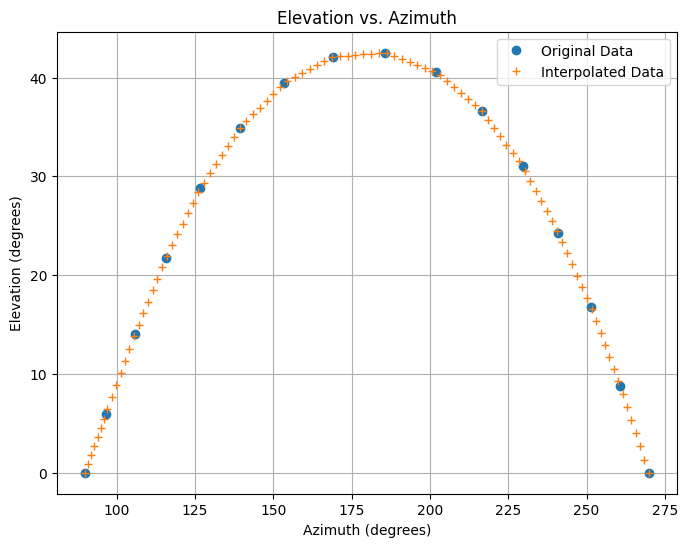

In [221]:
# Plotting Elevation as a function of Azimuth
plt.figure(figsize=(8, 6))

# Original data
plt.plot(sun_az, sun_el, 'o', label='Original Data')

# Interpolated data
plt.plot(sun_az_interp, sun_el_interp, '+', label='Interpolated Data')

plt.title('Elevation vs. Azimuth')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Elevation (degrees)')
plt.legend()
plt.grid(True)

plt.show()

In [222]:
# Convert degrees to radians
R = 10
az_rad = np.radians(sun_az_interp)
el_rad = np.radians(sun_el_interp)

sun_angles = np.zeros((N, 3))
sun_angles[:,0] = R * np.cos(el_rad) * np.cos(az_rad)
sun_angles[:,1] = R * np.cos(el_rad) * np.sin(az_rad)
sun_angles[:,2] = R * np.sin(el_rad)

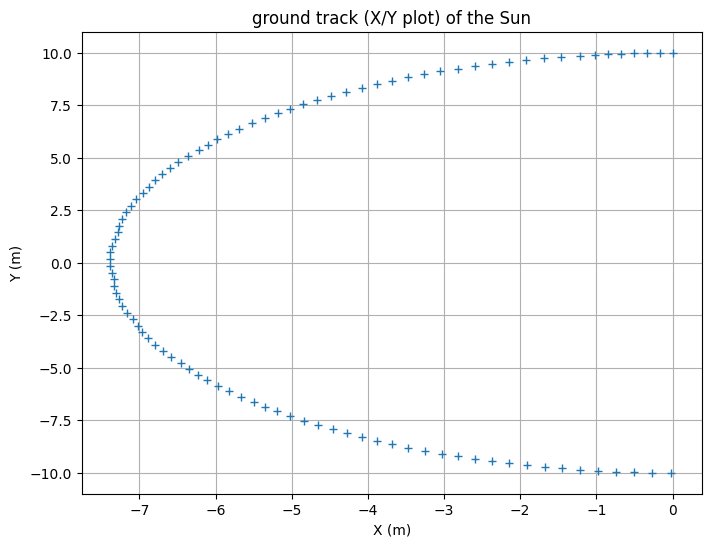

In [223]:
# Plotting Elevation as a function of Azimuth
plt.figure(figsize=(8, 6))
plt.plot(sun_angles[:, 0], sun_angles[:, 1], '+')
plt.grid(True)
plt.title('ground track (X/Y plot) of the Sun')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.show()

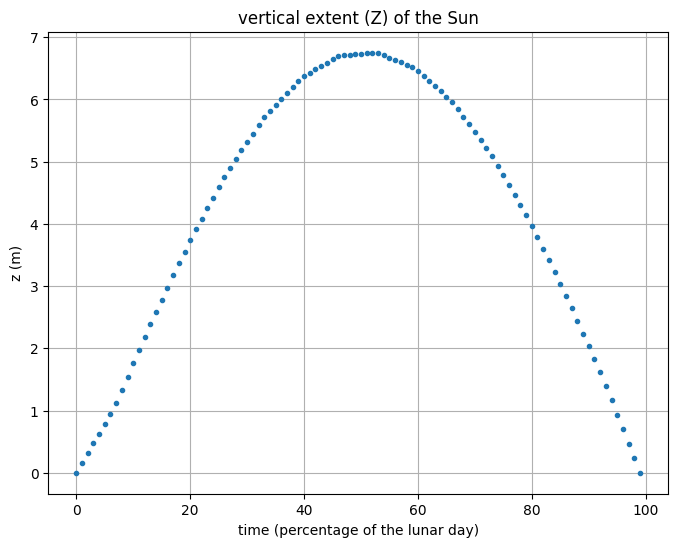

In [224]:
# Plotting Elevation as a function of Azimuth
plt.figure(figsize=(8, 6))
plt.plot(sun_angles[:, 2], '.')
plt.grid(True)
plt.title('vertical extent (Z) of the Sun')
plt.xlabel('time (percentage of the lunar day)')
plt.ylabel('z (m)')

plt.show()

In [225]:
scene = {}

# lunar surface is static so only compute geometric aspects once
data = {}
data['face_vertex_indices'] = prims_utils.get_prim_attribute_value(ground_path, "faceVertexIndices")
data['points_world'] = get_mesh_vertices_world(ground_path)
data['normals'] = get_rect_normals(data['points_world'], data['face_vertex_indices'])
data['quad_centers'] = get_quad_centers(data['points_world'], data['face_vertex_indices'])
data['alpha'] = lunar_alpha
data['epsilon'] = lunar_epsilon
data['temperatures'] = []
scene['surface'] = data.copy()

# supports are static so only compute geometric aspects once


for i in [1, 2]:
    data = {}
    data['face_vertex_indices'] = prims_utils.get_prim_attribute_value(support1_path[:-1] + str(i), "faceVertexIndices")
    data['points_world'] = get_mesh_vertices_world(support1_path[:-1] + str(i))
    data['quad_centers'] = get_quad_centers(data['points_world'], data['face_vertex_indices'])
    data['normals'] = get_rect_normals(data['points_world'], data['face_vertex_indices'])
    data['rect_areas'] = get_rect_areas(data['points_world'], data['face_vertex_indices'])
    data['alpha'] = support_alpha
    data['epsilon'] = support_epsilon
    data['temperatures'] = []
    scene[f'support{i}'] = data.copy()

scene['panel'] = {}
scene['panel']['temperatures'] = []

in get_rect_normals(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles


In [226]:
# update computations for panel and sun angle movements 
minmax = [200, 450]
adjust_light(stage, sun_coord, intensity=3e12)
for p,s in zip(panel_angles, sun_angles):
    set_prim_orientation_euler(panel_path, p, degrees=True)
    adjust_light(stage, tuple(s))
    
    timeline.play()
    for _ in range(2):
        simulation_app.update()
    timeline.pause()

    ## independent equation: lunar surface thermal
    data = scene['surface']
    sun_dot_products = compute_sun_to_mesh(data['quad_centers'], output='dotproducts')
    temperatures = compute_thermal_surface(sun_dot_products, data['normals'])    
    temperature_colors = color_conversion(temperatures, minmax)
    temperature_colors[100:] = 0  # only keep the top face of the lunar surface, set the other faces to black
    data['temperatures'].append(np.nanmax(temperatures))
    #print(np.nanmax(temperatures))
    prims_utils.set_prim_attribute_value(ground_path, "primvars:displayColor", temperature_colors)
    scene['surface'] = data.copy()
    
    ## single node equation: panel and support thermal

    # compute the panel data that changes on each loop
    data = scene['panel']
    data['face_vertex_indices'] = prims_utils.get_prim_attribute_value(panel_path, "faceVertexIndices")
    data['points_world'] = get_mesh_vertices_world(panel_path)
    data['quad_centers'] = get_quad_centers(data['points_world'], data['face_vertex_indices'])
    data['normals'] = get_rect_normals(data['points_world'], data['face_vertex_indices'])
    data['rect_areas'] = get_rect_areas(data['points_world'], data['face_vertex_indices'])
    data['alpha'] = panel_alpha
    data['epsilon'] = panel_epsilon
    scene['panel'] = data.copy()

    # compute the thermal data for all three nodes
    for node, path in zip(['panel', 'support1', 'support2'], [panel_path, support1_path, support2_path]):
        
        data = scene[node]
        sun_dot_products = compute_sun_to_mesh(data['quad_centers'], output='dotproducts')        
        temperature = compute_thermal_node(
            sun_dot_products,
            data['rect_areas'],
            data['normals'],
            data['alpha'],
            data['epsilon']
        )
        #if node=='panel': print(temperature)
        #print(f"{temperature:.0f} degK")
        data['temperatures'].append(temperature)
        #if node=='panel': print(data['temperatures'])
        scene[node] = data.copy()
        temperature_colors = color_conversion(np.ones(len(data['points_world'])) * temperature, minmax)
        prims_utils.set_prim_attribute_value(path, "primvars:displayColor", temperature_colors)

    
    world.render()

in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles


/tmp/ipykernel_6071/2415624749.py:11: RuntimeWarning: divide by zero encountered in divide
  temperatures = (q_sun / q_space) ** (1/4)
/tmp/ipykernel_6071/2372477962.py:19: RuntimeWarning: All-NaN slice encountered
  data['temperatures'].append(np.nanmax(temperatures))


in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rectangles
in get_rect_normals(): assuming rectangles
in get_rect_areas(): assuming rec

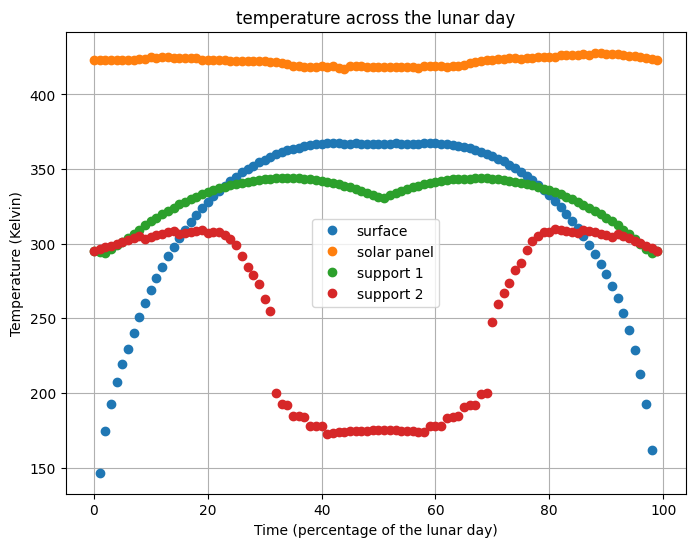

In [231]:
# Plotting Elevation as a function of Azimuth
plt.figure(figsize=(8, 6))

plt.plot(scene['surface']['temperatures'], 'o', label='surface')
plt.plot(scene['panel']['temperatures'], 'o', label='solar panel')
plt.plot(scene['support1']['temperatures'], 'o', label='support 1')
plt.plot(scene['support2']['temperatures'], 'o', label='support 2')

plt.title('temperature across the lunar day')
plt.ylabel('Temperature (Kelvin)')
plt.xlabel('Time (percentage of the lunar day)')
plt.legend()
plt.grid(True)

plt.show()


## Utils

In [11]:
# each cube face is a different color:
n_points = len(prims_utils.get_prim_attribute_value(ground_path, "points"))

import matplotlib.colors as mcolors
# Define six equally spaced hues in the HSV space
hues = np.linspace(0, 1, 6, endpoint=False)  # hue = colorhweel: hue 0 and hue 1 are the same so do not include endpoint
rgb_colors = [mcolors.hsv_to_rgb((hue, 1.0, 1.0)) for hue in hues]
 
face_colors = np.zeros((n_points, 3))

# Define the index ranges based on the mesh point structure
assert n_points >= 280
cube_mask = [
    np.arange(0, 100),   # front
    np.arange(100, 200), # back
    np.arange(200, 220), # four sides
    np.arange(220, 240),
    np.arange(240, 260),
    np.arange(260, 280)
]

for i, mask in enumerate(cube_mask):
    face_colors[mask] = rgb_colors[i]

In [ ]:
# compute power generation

# Initialize the angle map
sun_angles = np.zeros(len(quad_centers))
dot_products = np.zeros(len(quad_centers))
hit_distances = []
for i, center in enumerate(quad_centers):
    vector_to_cell = center - sun_coord
    distance = np.linalg.norm(vector_to_cell)
    direction = vector_to_cell / distance

    # Cast a ray from the Sun to the cell center
    hit_info = get_physx_scene_query_interface().raycast_closest(sun_coord, direction, distance + 1)  # increase max distance to avoid ray not reaching the surface

    if hit_info["hit"]:
        hit_distance = np.linalg.norm(hit_info["position"] - center)
        hit_distances.append(hit_distance)
        if hit_distance < 0.001: # consider that there is no obstruction between the sun and the cell center
            normal = np.array(hit_info["normal"])
            dot_products[i] = np.dot(normal, direction)
            sun_angles[i] = np.arccos(dot_products[i]) * (180 / np.pi)  # Convert to degrees
        else: # cell is in shadow of obstruction
            sun_angles[i] = np.nan
    else:
        print(f"no hit, angle for cell center at {center} is undefined")
        sun_angles[i] = np.nan  # No hit, angle is undefined

sun_angles